<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name: Heidi Yoon**

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



## Workflow for this notebook
**Steps to process one scene of Landsat data:**
1. Make a list of all the bands for one scene.
2. Open and clean data for valid values for that scene. 
3. Calculate the NDVI, mask for clouds, and calculate the mean NDVI for that scene.
**Steps to process all scenes for one site of Landsat data:**
1. Make a list of all scenes (dates) for one site.
2. For each scene, open and clean data for valid values, calculate the NDVI, mask for clouds, and calculate the mean NDVI.
3. Store the mean NDVI, date of the scene, and site name for each scene in a pandas dataframe.
**Steps to process multiple sites of Landsat data:**
1. Make a list of all the sites.
2. For each site, get the data and clean for valid values for each scene, calculate the NDVI, mask for clouds, and calculate the mean NDVI for each scene.
3. Store the mean NDVI, date, and site name for each scene in a pandas dataframe.
4. Export the dataframe with mean NDVI to csv.

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
# and no unused imports listed (10 points total)
import os
from glob import glob

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.mask as em
import pyproj
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Download data and set working directory
et.data.get_data('ndvi-automation')
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


# Data Source and Areas of Interest
* In this notebook, we analyze Landsat 8 imagery and vector files for two field sites in the National Ecological Observatory Network (NEON). The first field site is the Harvard Forest and Quabbin Watershed (HARV), which is located approximately 65 miles west of Boston, Massachusetts. The second field site is the San Joaquin Experimental Range (SJER) located approximately 25 miles north of Fresno, California.
* These data are available online as part of the <a href="https://earthpy.readthedocs.io/en/latest/earthpy-data-subsets.html#ndvi-automation" target="_blank">EarthPy Data Subset</a>.

# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [4]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

In [5]:
# In this cell place all of the functions needed to run your notebook
def open_clean_band(band_path, clip_extent, valid_range=None):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : str
        A list of paths to the tif file

    clip_extent : geopandas geodataframe
        A geodataframe containing the clip extent of interest. NOTE:
        this will fail if the clip extent is in a different CRS than the
        raster data.

    valid_range : tuple (optional)
        The min and max valid range for the data. All pixels with values
        outside of this range will be masked.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """
    # Clip a band of landsat data to the area of interest
    band = rxr.open_rasterio(band_path, masked=True).rio.clip(
        clip_extent.geometry, from_disk=True).squeeze()

    # Mask values outside of a valid range
    if valid_range:
        mask = ((band <= valid_range[0]) | (band > valid_range[1]))
        cleaned_band = band.where(~mask, np.nan)

    return cleaned_band


def masked_ndvi(all_bands, clip_extent, pixel_qa_path, vals):
    """Open and mask a single landsat band using a pixel_qa layer.

    Parameters
    -----------
    all_bands : list
        A list containing two xarray objects for landsat bands 4 and  5
    clip_extent: geopandas GeoDataFrame
        A geodataframe containing the clip extent of interest. NOTE:
        this will fail if the clip extent is in a different CRS than the
        raster data.
    pixel_qa_path: str
        A path to a pixel qa tif file.
    vals: list
        A list of values needed to create the cloud mask

    Returns
    -----------
    ndvi_crop : Xarray Dataset
        a cropped and masked xarray object containing NDVI values
    """
    # Open and clip landsat qa layer
    pixel_qa = rxr.open_rasterio(
        pixel_qa_path[0], masked=True).rio.clip(
        clip_extent.geometry, from_disk=True).squeeze()

    # Calculate NDVI
    ndvi_xr = (all_bands[1]-all_bands[0]) / (all_bands[1]+all_bands[0])

    # Apply cloud mask to NDVI
    ndvi_mask = ndvi_xr.where(~pixel_qa.isin(vals))

    return ndvi_mask


def open_site_vector(site_path):
    """A function that opens a shapefile for a site location.

    Parameters
    ----------
    site_path: str
        A list of paths to the site directory.

    Returns
    -------
    crop_bound: geopandas DataFrame
        A geodataframe of the crop boundary for the site location.
    """
    vector_dir = os.path.join(site_path, "vector")
    site_name = os.path.basename(os.path.normpath(site_path))
    site_boundary_path = os.path.join(
        vector_dir, site_name + "-crop.shp")

    # Open the crop boundary as a geodataframe
    crop_bound = gpd.read_file(site_boundary_path)
    return crop_bound


def mean_ndvi_df(folder_name):
    """Calculate mean NDVI for a landsat data directory.

    Parameters
    ----------
    folder_name: str
        A list of paths to the landsat site folder.

    Returns
    -------
    ndvi_df: pandas DataFrame
        A DataFrame containing the mean NDVI, date of when the data was
        measured, and the site name.
    """
    # Make a list of all the dates in the directory
    all_dates = glob(os.path.join(folder_name, "landsat-crop", "*"))

    # Open the crop boundary for the site location
    crop_bound = open_site_vector(folder_name)

    # Initialize lists for mean NDVI, date, and site name
    all_ndvi = []
    dates = []
    site = []
    column_names = ["mean_ndvi", "site", "date"]

    # For all the dates, list all of the band paths and qa path
    for adate in all_dates:
        band_paths = sorted(
            glob(os.path.join(adate, "*band*[4-5].tif")))
        landsat_qa_path = glob(os.path.join(adate, "*qa*"))
        # Store the date and file name for each date.
        dates.append(adate[-29:-21])
        site.append(adate[22:26])
        # Initialize list for bands 4 and 5 xarrays
        all_bands = []
        # For all the band paths, open and clean bands 4 and 5
        for aband in band_paths:
            band = open_clean_band(aband, crop_bound, (0, 10000))
            all_bands.append(band)

        # Calculate NDVI and mask for clouds, then calculate mean NDVI
        avg_ndvi = masked_ndvi(
            all_bands, crop_bound, landsat_qa_path, cloud_values).mean()
        all_ndvi.append(avg_ndvi)

    # Create a dataframe to store mean NDVI, date, site name
    df = pd.DataFrame(columns=column_names)
    df["mean_ndvi"] = xr.concat(all_ndvi, dim="array").to_series()
    df["site"] = site
    df["date"] = dates
    df["date"] = pd.to_datetime(df["date"])
    ndvi_df = df.set_index("date")
    return ndvi_df


def ndvi_all_sites(path_name):
    """Calculate mean NDVI for all sites in a Landsat data directory

    Parameters
    ----------
    path_name: str
        A list of paths to the Landsat data directory for all sites.

    Returns
    -------
    ndvi_allsites: pandas dataframe
        A dataframe containing the mean NDVI, site name, and date of
        Landsat measurement.
    """
    # Make a list of all the sites
    all_sites = glob(os.path.join(path_name, "*"))
    # Initialize the list of NDVI dataframes
    ndvi_ls = []
    for asite in all_sites:
        # Calculate the mean NDVI for each site
        ndvi_df = mean_ndvi_df(asite)
        ndvi_ls.append(ndvi_df)
    ndvi_allsites = pd.concat(ndvi_ls, axis=0)
    return ndvi_allsites

# How we process all of the Landsat scenes for the HARV site
* We process all of the scenes for the HARV site in the cell below by using the function mean_ndvi_df(). First, we make a list of all of the scenes. Then for each scene, we process the bands using the function open_clean_band(), and we calculate the NDVI and mask for clouds using the function masked_ndvi(). We also use the function open_site_vector() to open the crop boundary for the HARV site. Once we have calculated the NDVI for a scene, we calculate the mean NDVI and store it with the date of the scene and site name in a pandas dataframe. The final dataframe is returned by the mean_ndvi_df() function.
* In order to make the code run faster, we made some choices in our functions to optimize for speed. In the functions, open_clean_band() and masked_ndvi, we pipe the rioxarray commands and read from_disk. In the function masked_ndvi(), we also chose to apply the cloud mask at the end of the NDVI calculation.
* We made the code more concise by using functions and using loops to open and clean bands 4 and 5 for all of the scenes and to mask and calculate NDVI for all of the scenes.

In [6]:
# Create dataframe of mean NDVI in this cell using the functions created above
# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Call the dataframe at the end of the cell so the tests run on it!
# Be sure that the date column is an index of type date
# HINT: the time series lessons may help you remember how to do this!

# Define cloud mask values
high_cloud_confidence = (
    em.pixel_flags['pixel_qa']['L8']['High Cloud Confidence'])
cloud = em.pixel_flags['pixel_qa']['L8']['Cloud']
cloud_shadow = em.pixel_flags['pixel_qa']['L8']['Cloud Shadow']

cloud_values = high_cloud_confidence + cloud + cloud_shadow

# Create dataframe of mean NDVI for the HARV site
ndvi_harv = mean_ndvi_df("ndvi-automation/sites/HARV")

# Remove NaN values
ndvi_harv_clean = ndvi_harv.dropna(how='any')
ndvi_harv_clean

,mean_ndvi,site
date,,
2017-03-17,0.281132,HARV
2017-04-02,0.251109,HARV
2017-04-18,0.541080,HARV
2017-05-04,0.568924,HARV
2017-05-20,0.811310,HARV
2017-06-21,0.881739,HARV
2017-07-23,0.819768,HARV
2017-08-24,0.864464,HARV
2017-09-09,0.857666,HARV


In [7]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

# How we process the Landsat scenes for all sites
* We process all of the scenes for all sites in the cell below by using the function ndvi_all_sites(). First, we make a list of all the sites. Then for each site, we calculate the mean NDVI using the function mean_ndvi_df. We concatenate the list of mean NDVI dataframes for all the sites and return the final dataframe which stores the mean NDVI, date of each scene, and site name.
* In order to make the code run faster, we use the global pyproj context.
* We made the code more concise by using functions and using loops to calculate NDVI for all of the scenes in each site. We also used the function open_site_vector() to open the corresponding vector shapefile for each site. 

In [8]:
# Create dataframe of NDVI including the cleaning data to deal with clouds

# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Don't forget to set date as the index and make the values of type datetime

# Set pyproj settings
pyproj.set_use_global_context(True)

# Calculate the mean NDVI for all sites
ndvi_harv_sjer = ndvi_all_sites("ndvi-automation/sites")

# Export mean NDVI dataframe to csv
ndvi_harv_sjer.to_csv("ndvi-automation/outputs/ndvi_harv_sjer.csv")

ndvi_harv_sjer

,mean_ndvi,site
date,,
2017-01-12,NaN,HARV
2017-01-28,NaN,HARV
2017-02-13,NaN,HARV
2017-03-01,NaN,HARV
2017-03-17,0.281132,HARV
2017-04-02,0.251109,HARV
2017-04-18,0.541080,HARV
2017-05-04,0.568924,HARV
2017-05-20,0.811310,HARV


In [9]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points +=2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points +=2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points +=3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points +=3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
✅ Correct number of masked data values!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:57.273169.

 ➡ You received 10 out of 10 points for creating a dataframe.


10

# Figure: Mean NDVI for two NEON sites in 2017

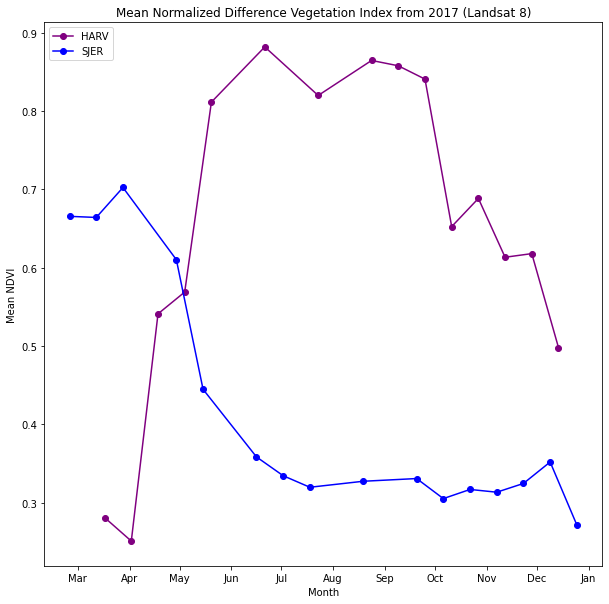

In [10]:
# Add only the plot code to this cell

# This is the final figure of mean NDVI
# for both sites across the year
# with data cleaned to deal with clouds

# Remove NaN values
ndvi_clean = ndvi_harv_sjer.dropna(how='any')

# Define plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Set plot variables
for site, site_df in ndvi_clean.groupby(["site"]):

    if site == 'HARV':
        color = "purple"

    else:
        color = "blue"

    ax.plot(site_df.index,
            site_df.mean_ndvi,
            marker="o",
            color=color,
            label=site)

# Set titles and axes labels
ax.xaxis.set_major_formatter(DateFormatter("%b"))
ax.set(
    title="Mean Normalized Difference Vegetation Index from 2017 (Landsat 8)",
    xlabel="Month",
    ylabel="Mean NDVI")

# Set legend
ax.legend(loc="upper left")

### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [11]:
# Ignore this cell for the autograding tests


In [12]:
# Ignore this cell for the autograding tests


# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

* For the HARV site, I would recommend that the flights take place during May to November to measure a mean NDVI of at least 0.6. For peak greenness at the HARV site, flights could take place from June to October with mean NDVI values of at least 0.8.
* For the SJER site, I would recommend that the flights take place during March to May to measure a mean NDVI of at least 0.6.

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

* For more long-term studies, since Landsat scenes are collected bi-monthly, we could continue the analysis for several years to look for stability or changes from year-to-year.
* For short-term intensive studies, we could pick time periods of interest and analyze MODIS data, which is collected daily, to get more resolution in time for NDVI fluctuations.

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!
